# TP3. Cross-validation, boosting, hyperparameter tuning


Dans ce TP, on va voir des aspects plus "méta" du machine learning. On tentera de répondre aux questions suivantes : 

- Comment évaluer de manière robuste les modèles, sans que cela ne dépende totalement de la séparation train/test? C'est ce que la cross validation nous aidera à faire dans un premier temps.  
- Comment aggréger plein de modèles faibles pour en faire un modèle fort? On fera du boosting. 
- Comment trouver les meilleurs hyperparamètres d'un modèle? On verra l'algorithme GridSearch 

Dans ce notebook, les éléments explicatifs seront écrits au fil des questions, pour suivre un enchaînement plus naturel.


## Consignes 

**Cross-validation**

1. Charger les datasets ```iris``` et ```diabetes``` de scikit-learn
2. Séparer le dataset ```iris``` en deux train/test sets différents, ```(X_train1, y_train1, X_test1, y_test1), (X_train2, y_train2,  X_test2, y_test2)```. Afficher l'histogramme des espèces pour chacun des train/test.
3. Faire de même pour ```diabetes```. Que remarquez-vous? 
4. Entraîner une forêt aléatoire ```rf1```sur ```X_train1, y_train1```, et une autre forêt aléatoire ```rf2```sur ```X_train2, y_train2```. Evaluer. Comparer.  
5. Faire une cross-validation, pour ```iris``` et ```diabetes```. 

**Boosting**

6. Evaluer les performances d'adaboost, avec le cross-val score, sur ```iris``` et ```diabetes```
7. Les performances changent-elles en fonction du ```base_estimator``` choisi?

**Hyperparameter tuning**

8. Avec GridSearch


## Cross-validation


### 1. Charger les datasets iris et diabetes de scikit-learn

Toujours avec les fonctions de load de ```scikit-learn```:

In [1]:
from sklearn.datasets import load_iris, load_diabetes

iris = load_iris()
X_iris, y_iris = iris.data, iris.target
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data, diabetes.target

### 2. Séparer le dataset ```iris``` en deux train/test sets différents, ```(X_train1, y_train1, X_test1, y_test1), (X_train2, y_train2,  X_test2, y_test2)```. Afficher l'histogramme des espèces pour chacun des train/test.

On reprend, comme dans les sujets précédents, la fonction ```train_test_split``` de ```scikit-learn```

In [2]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_iris, y_iris)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_iris, y_iris)

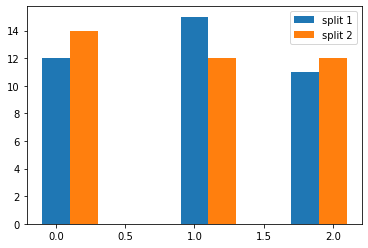

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.figure()
plt.hist(y_test1, align='left', label="split 1")
plt.hist(y_test2, align='right', label="split 2")
plt.legend()
plt.show()

### 3. Faire de même pour diabetes. Que remarquez-vous? 

Idem en régression :

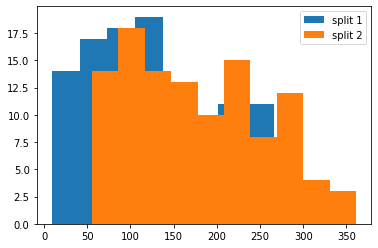

In [4]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_diabetes, y_diabetes)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_diabetes, y_diabetes)

plt.figure()
plt.hist(y_test1, align='left', label="split 1")
plt.hist(y_test2, align='right', label="split 2")
plt.legend()
plt.show()

On remarque que selon le train-test split, les différents ```X_train, X_test``` peuvent changer, à cause du tirage aléatoire. Cela a pour conséquence que pour deux train-test split différents, on a des datasets d'entraînement/test complètement différents, même si l'on ajoute l'option ```stratify``` de scikit-learn (voir TP1).

En évaluation, on aura des répartitions des classes/valeurs différentes pour deux ```y_test``` : mécaniquement, on aura des métriques d'évaluation différentes selon le tirage aléatoire dans les train-test split. 

On le voit clairement dans l'expérimentation suivante : 

### 4. Entraîner une forêt aléatoire ```rf1```sur ```X_train1, y_train1```, et une autre forêt aléatoire ```rf2```sur ```X_train2, y_train2```. Evaluer. Comparer.  

In [5]:
from sklearn.ensemble import RandomForestClassifier
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_iris, y_iris)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_iris, y_iris)
rf1 = RandomForestClassifier()
rf2 = RandomForestClassifier()

rf1.fit(X_train1, y_train1)  # Notre première forêt
rf2.fit(X_train2, y_train2)  # La deuxième

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, rf1.predict(X_test1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [7]:
print(classification_report(y_test2, rf1.predict(X_test2)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Sur le dataset ```iris``` (classification), on voit que le même modèle (une forêt aléatoire en classification), entraîné et évalué sur deux splits différents, peut passer d'une accuracy de 97% à une accuracy de 100%. 

Regardons ce qu'il en est sur la régression:

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_diabetes, y_diabetes)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_diabetes, y_diabetes)

rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()

rf1.fit(X_train1, y_train1)
rf2.fit(X_train2, y_train2)


print(r2_score(y_test1, rf1.predict(X_test1)))
print(r2_score(y_test2, rf1.predict(X_test2)))



0.3995196790822675
0.8122605677229207


/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Ici, c'est encore pire : le R2 (qui varie entre 0 et 1 et qui est proche de 1 pour les bons modèles et proche de 0 pour les mauvais) change quasiment du simple au double.

On veut avoir une estimation plus robuste des performances du modèle, et c'est là que la cross-validation intervient. 

On appelle une validation croisée "k-fold" l'algorithme suivant : 

1. Diviser le dataset en $k$ sous-datasets de taille égale ($\sim \frac{n}{k}$ lignes dans chaque subset). On appelle $$g : \{1, ..., N \} \rightarrow \{1, ..., k\}$$ la fonction qui à un $x_i$ lui associe sa partition (1, 2, ... ou k)

2. Pour i=1, ...,k, on entraîne un modèle sur toutes les données sauf la partition $i$, qu'on appelle 
$$\hat{f}^{-i}(x) $$

3. Une fois que l'on a entraîné nos $k$ modèles, on peut estimer l'erreur par:
$$ \text{CV}(\hat{f}) = \frac{1}{N} \sum_{i=1}^N L\left(y_i, \hat{f}^{-g(i)}(x_i) \right)$$

Où $L$ est la fonction de perte/d'évaluation choisie. 

Dans la suite, on utilisera uniquement cette estimation consolidée pour évaluer nos algorithmes. Regardons plus en détail comment la cross validation fonctionne avec ```sklearn```.
     

### 5. Faire une cross-validation, pour ```iris``` et ```diabetes```. 

La fonction ```cross_validate``` renvoie les scores de cross-validation, mais aussi des informations sur le temps nécessaire pour fitter et évaluer chacun des modèles. 

Dans la pratique, ces informations ne sont pas toujours nécessaires, on utilise donc plutôt en général la fonction ```cross_val_score```. 

In [9]:
from sklearn.model_selection import cross_validate
cross_validate(RandomForestClassifier(), X_iris, y_iris )

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 

{'fit_time': array([0.02042699, 0.02023697, 0.01645684]),
 'score_time': array([0.00130081, 0.00126815, 0.00105715]),
 'test_score': array([0.98039216, 0.92156863, 0.97916667])}

In [22]:
from sklearn.model_selection import cross_val_score

# cross_val_score renvoie un array qui contient les scores de chacun des k=5 modèles
# On calcule nous même la moyenne avec le .mean():
cross_val_score(RandomForestClassifier(), X_iris, y_iris, cv=5).mean()

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

0.96

Maintenant qu'on a vu comment utiliser les deux fonctions, regardons la fluctuation du cross val score (il fluctue encore légèrement : le tirage est aléatoire), en fonction du paramètre $k$. 


Ecrire une fonction qui fait $100$ fois une cross validation pour une forêt aléatoire sur le dataset iris, avec comme paramètre $k$.

Tracer des boxplot des séries de $100$ estimations pour $k=5$ et pour $k=10$. 

Tracer la courbe d'évolution de la variance des séries de $100$ estimations pour $k=1, ..., 100$.

Que remarquez-vous?

In [ ]:
def see_fluc(k):
    fluctuation = []
    for i in range(100):
        fluctuation.append(cross_val_score(RandomForestClassifier(), X_iris, y_iris, cv=k).mean())
    return fluctuation



fluctuation1 = see_fluc(5)
fluctuation2 = see_fluc(10)

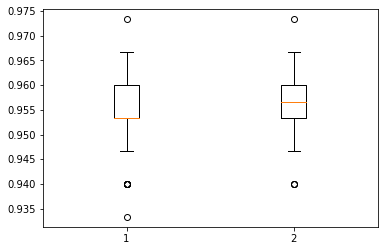

In [25]:
plt.figure()
plt.boxplot([fluctuation1, fluctuation2])
plt.show()

Les boxplots ne nous permettent pas de très bien voir la différence de fluctuation. 

Traçons la courbe de l'évolution de la variance des séries en fonction de $k$: (un peu long, on entraîne beaucoup de modèles)

In [ ]:
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
v = [np.array(see_fluc(i)).std() for i in k]

<Figure size 432x288 with 0 Axes>

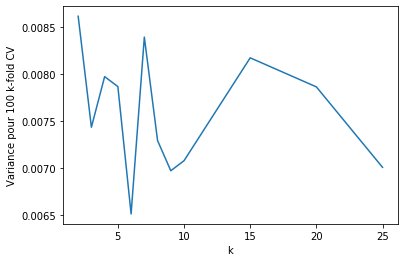

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure()
plt.plot(k, v)
plt.xlabel('k')
plt.ylabel('Variance pour 100 k-fold CV')
plt.figure()

## Boosting


Le boosting est une technique d'apprentissage qui consiste à aggréger plusieurs prédicteurs faibles, pour construire un prédicteur plus performant. 

Par soucis de clarté des notations, on considèrera dans la suite un problème de classification binaire tel que les $n$ éléments du dataset appartiennent à $\mathcal{X}\in \mathbb{R}^p$ ($p$ features numériques), et les labels appartiennent à $\mathcal{Y}\in \{+1, -1\}$. 

On définit en outre $\mathcal{G}$ notre ensemble de classifieurs faibles : on peut par exemple prendre $\mathcal{G}$ ensemble des arbres de décision de profondeur $2$, etc...


On définit l'ensemble suivant:

$$\mathcal{H}_{\lambda} = \{ \lambda \times \text{Conv}(\mathcal{G})  \} $$
    $$=\left \{ \sum_{j=1}^{m} \alpha_j g_j, m \in \mathbb{N}^*, g_1, ..., g_m \in \mathcal{G}, \alpha_1, ..., \alpha_m \geq  0, \sum_{i=1}^m \alpha_j \leq \lambda \right\} $$


Dans ce contexte, le predicteur de boosting $\hat{h}^{\text{boost}}$ est le suivant : 

$$\hat{h}^{\text{boost}} \in \arg \underset{h\in \mathcal{H}_{\lambda}}{\min} \frac{1}{n} \sum_{i=1}^n e^{-y_i h(x_i)}$$ 

Les raisons pour lesquelles on pose le prédicteur de boosting de cette manière seront détaillées dans les cours plus théoriques de machine learning au S2 de 2A et en 3A. L'important est de remarquer qu'on est placé dans un problème d'optimisation convexe, qui peut donc nous garantir un minimum global de la fonction de perte; mais qui a le désavantage d'être défini sur un espace de dimension infinie. 

On ne va en général pas pouvoir résoudre de manière exacte ce programme d'optimisation. À la place, on approxime la solution avec un algorithme. Ici, on présente **adaboost**:

- 1. **Initialisation** :  On définit $n$ poids initiaux (pour chacuns des exemples). Pour ne mettre aucun à priori, on donne à chaque élément le même poids : $$w_1 = \frac{1}{n}, ..., w_n = \frac{1}{n} $$

- 2. **Pour m = 1, ..., M** :
    - a) On définit le prédicteur $\hat{g}_m \in \arg \underset{g\in \mathcal{G}}{\min} \sum_{i=1}^n w_i 1_{\{y_i \neq g(x_i)\}}$, c'est à dire que l'on minimise la fonction de perte pondérée sur notre ensemble de prédicteurs $\mathcal{G}$. En suivant l'exemple des arbres de profondeur 2, $\hat{g}_m$ est l'arbre de profondeur 2 qui minimise la perte pondérée par les poids au temps $m$. 
    - b) Ensuite, on évalue l'erreur commise au temps $m$ : $\hat{e}_m = \frac{1}{\sum_{i=1}^n w_i} \left ( \sum_{i=1}^n w_i 1_{\{y_i \neq \hat{g}(x_i)\}}\right)$.
    - c) On définit un poids qui sera associé au prédicteur $\hat{g}_m$ : $\hat{a}_m = \frac{1}{2}\ln \left( \frac{1-\hat{e}_m}{\hat{e}_m}\right)$
    - d) Enfin, on met à jour les poids associés à chacuns des exemples du dataset pour mettre l'emphase sur les éléments mal classifiés, afin qu'à chaque étape l'algorithme apprenne à classifier les éléments les plus difficiles à classifier : $$ w_i := w_i \exp \{ \hat{a}_m 1_{\{y_i \neq \hat{g}_m\}}\}$$

- 3. Enfin, on définit le classifieur final : 
$$\hat{g}(x) = \text{signe} \left( \sum_{m=1}^M \hat{a}_m \hat{g}_m \right)$$ 

Cet algorithme d'approximation a historiquement fourni de bons résultats sur les benchmarks classiques en machine learning. Voyons ce qu'il donne, en l'évaluant évidemment avec le cross val score. 

### 6. Evaluer les performances d'adaboost, avec le cross-val score, sur ```iris``` et ```diabetes```


In [48]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier() #DecisionTreeClassifier(max_depth=1)
print(cross_val_score(clf, X_iris, y_iris, cv=10).mean())

0.9533333333333334


On est à pein meilleur que sur les algorithmes précédents. Regardons l'évolution en fonction du base estimator (l'ensemble $\mathcal{G}$ de prédicteurs faibles) choisi. 


### 7. Les performances changent-elles en fonction du ```base_estimator``` choisi?


Estimons les performances d'Adaboost pour des ensembles $\mathcal{G}$ d'arbres de profondeur croissante :

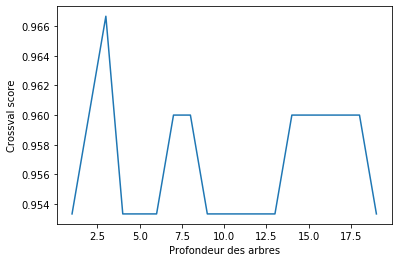

In [49]:
from sklearn.tree import DecisionTreeClassifier
perf_dt = []
for i in range(1,20):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i))
    perf_dt.append(cross_val_score(clf, X_iris, y_iris, cv=10).mean())
plt.figure()
plt.plot(np.arange(1, 20), perf_dt)
plt.xlabel('Profondeur des arbres')
plt.ylabel('Crossval score')
plt.show()

Regardons les performances de ce qui semble être empiriquement la profondeur optimale, pour ce dataset:

In [15]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3)) 
print(cross_val_score(clf, X_iris, y_iris, cv=10).mean())

0.96


Passons maintenant au problème de régression, avec : 

1. Des arbres de régression
2. Des régressions linéraires

0.3874237247863836


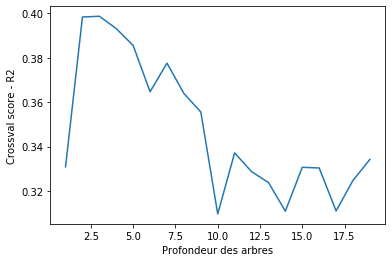

In [52]:
from sklearn.ensemble import AdaBoostRegressor

rg = AdaBoostRegressor() #DecisionTreeClassifier(max_depth=1) - default parameter
print(cross_val_score(rg, X_diabetes, y_diabetes, cv=10, scoring='r2').mean())

from sklearn.tree import DecisionTreeRegressor
perf_dt = []
for i in range(1,20):
    rg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=i))
    perf_dt.append(cross_val_score(rg, X_diabetes, y_diabetes, cv=10, scoring='r2').mean())
plt.figure()
plt.plot(np.arange(1, 20), perf_dt)
plt.xlabel('Profondeur des arbres')
plt.ylabel('Crossval score - R2')
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

rg = AdaBoostRegressor(LinearRegression()) 
print(cross_val_score(rg, X_diabetes, y_diabetes, cv=10, scoring='r2').mean())


0.4580273510576349



## Hyperparameter tuning

On voit qu'une fois que l'on sait entraîner un algorithme de machine learning, et l'évaluer de manière robuste grâce au cross-val score, il reste une dernière chose sur laquelle on peut jouer : les hyperparamètres. 

Il existe de nombreux algorithmes d'optimisation d'hyperparamètres mais on n'utilisere ici que GridSearch, qui est assez simple. Comme son nom l'indique, on fournit à l'algorithme d'optimisation une grille d'hyperparamètres à tester. L'algorithme teste toutes les combinaisons d'hyperparamètres et retourne le meilleur modèle. 



### 8. Avec GridSearch, trouver les meilleurs paramètres en boosting sur la problème de régression de ```diabetes```



In [19]:
AdaBoostRegressor().get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [54]:
from sklearn.linear_model import Lasso

param_grid = {'base_estimator': [DecisionTreeClassifier(), LinearRegression(), Lasso()],
             'learning_rate': [0.001, 0.01, 0.1, 1.0],
             'n_estimators': [50, 100, 150, 200]}


In [55]:
from sklearn.model_selection import GridSearchCV
rg = GridSearchCV(AdaBoostRegressor(), param_grid=param_grid, scoring='r2')
rg.fit(X_diabetes, y_diabetes)                          

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight=None,
                                                                   criterion='gini',
                                                                   max_depth=None,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_dec...
                                                             n_jobs=None,
                                                             normalize=False),
                      

In [59]:
import pandas as pd
df = pd.DataFrame(rg.cv_results_)
df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
31,0.012355,0.001116,0.000909,0.000153,"LinearRegression(copy_X=True, fit_intercept=Tr...",1,200,{'base_estimator': LinearRegression(copy_X=Tru...,0.459064,0.517368,0.503772,0.493323,0.024932,1
16,0.038597,0.000315,0.002981,0.000329,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.001,50,{'base_estimator': LinearRegression(copy_X=Tru...,0.474777,0.487363,0.513818,0.491947,0.016272,2
25,0.088848,0.014046,0.006490,0.001712,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.1,100,{'base_estimator': LinearRegression(copy_X=Tru...,0.461205,0.507623,0.504047,0.490891,0.021113,3
23,0.158662,0.006078,0.010105,0.000511,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.01,200,{'base_estimator': LinearRegression(copy_X=Tru...,0.466751,0.495904,0.508892,0.490462,0.017637,4
21,0.078031,0.001795,0.005065,0.000257,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.01,100,{'base_estimator': LinearRegression(copy_X=Tru...,0.471994,0.490174,0.509247,0.490430,0.015218,5
19,0.175702,0.015932,0.010074,0.000506,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.001,200,{'base_estimator': LinearRegression(copy_X=Tru...,0.470851,0.489182,0.507377,0.489096,0.014920,6
22,0.146256,0.032766,0.008465,0.001100,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.01,150,{'base_estimator': LinearRegression(copy_X=Tru...,0.465284,0.492916,0.508860,0.488966,0.018017,7
26,0.100665,0.047303,0.006448,0.001769,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.1,150,{'base_estimator': LinearRegression(copy_X=Tru...,0.457536,0.499399,0.507632,0.488119,0.021958,8
18,0.122653,0.009469,0.008368,0.000525,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.001,150,{'base_estimator': LinearRegression(copy_X=Tru...,0.471194,0.485121,0.507597,0.487933,0.015002,9
27,0.096020,0.011462,0.006684,0.000887,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.1,200,{'base_estimator': LinearRegression(copy_X=Tru...,0.455270,0.503993,0.504417,0.487820,0.023095,10
